In [1]:
import numpy as np, healpy as hp, pickle, prjlib, curvedsky, plottools as pl, tqdm
from matplotlib.pyplot import *

In [2]:
ntype = 'base'
types = ['id','la','co','LA']
num = 50
#num = 2
p = {}
p['id'] = prjlib.analysis_init(t='id',ntype='cv')
p['LA'] = prjlib.analysis_init(t='la',freq='com',fltr='none',ntype=ntype+'_roll50')
p['la'] = prjlib.analysis_init(t='la',freq='com',fltr='cinv',ntype=ntype+'_roll50')
p['co'] = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype=ntype+'_roll50')
fig_kwargs = {'xlabsize':18,'ylabsize':18,'xticks_labsize':16,'yticks_labsize':16,'legend_size':16}

In [3]:
lmax, l = {}, {}
for c in types: lmax[c] = 4096
lmax['co'] = 2048
for c in types: l[c] = np.linspace(0,lmax[c],lmax[c]+1)

In [4]:
Wsa = hp.pixelfunc.ud_grade(prjlib.window('sa')[0],2048)
Wla = prjlib.window('la',ascale=0)[0] # here, apodized mask is used otherwise the correlations at edge gets worse
Wco = Wsa * Wla #hp.pixelfunc.ud_grade(Wla,512)

The loaded SAT mask is further multiplied by hit-count "binary" (not hit count itself)


/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 512
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [5]:
Elm, Blm = {}, {}
EE, BB, xE, xB = {}, {}, {}, {}
rhoE, rhoB = {}, {} 

In [6]:
for c in ['id','LA','la']:
    rhoE[c], rhoB[c] = 0., 0.
for i in tqdm.tqdm(range(1,num+1)):
    for c in ['id','LA','la']:
        Elm[c] = pickle.load(open(p[c].fcmb.alms['o']['E'][i],"rb"))[:lmax[c]+1,:lmax[c]+1]
        Blm[c] = pickle.load(open(p[c].fcmb.alms['o']['B'][i],"rb"))[:lmax[c]+1,:lmax[c]+1]
        # cutsky for E
        Elm[c] = curvedsky.utils.mulwin_spin(Elm[c],0*Elm[c],Wla)[0]
        Blm[c] = curvedsky.utils.mulwin_spin(0*Blm[c],Blm[c],Wla)[1]
        # cl
        EE[c,i] = curvedsky.utils.alm2cl(lmax[c],Elm[c])
        BB[c,i] = curvedsky.utils.alm2cl(lmax[c],Blm[c])
        if c=='id': continue
        xE[c,i] = curvedsky.utils.alm2cl(lmax[c],Elm[c],Elm['id'][:lmax[c]+1,:lmax[c]+1])
        xB[c,i] = curvedsky.utils.alm2cl(lmax[c],Blm[c],Blm['id'][:lmax[c]+1,:lmax[c]+1])
        # corr coeff
        rhoE[c] += xE[c,i]**2/EE[c,i]/EE['id',i][:lmax[c]+1]/num
        rhoB[c] += xB[c,i]**2/BB[c,i]/BB['id',i][:lmax[c]+1]/num

  0%|          | 0/50 [00:00<?, ?it/s]/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
100%|██████████| 50/50 [9:14:57<00:00, 665.95s/it]  


In [7]:
for c in ['id','co']:
    rhoE[c], rhoB[c] = 0., 0.
for i in tqdm.tqdm(range(1,num+1)):
    for c in ['id','co']:
        Elm[c] = pickle.load(open(p[c].fcmb.alms['o']['E'][i],"rb"))[:lmax[c]+1,:lmax[c]+1]
        Blm[c] = pickle.load(open(p[c].fcmb.alms['o']['B'][i],"rb"))[:lmax[c]+1,:lmax[c]+1]
        # cutsky for E
        Elm[c] = curvedsky.utils.mulwin_spin(Elm[c],0*Elm[c],Wco)[0]
        Blm[c] = curvedsky.utils.mulwin_spin(0*Blm[c],Blm[c],Wco)[1]
        # cl
        EE[c,i] = curvedsky.utils.alm2cl(lmax[c],Elm[c])
        BB[c,i] = curvedsky.utils.alm2cl(lmax[c],Blm[c])
        if c=='id': continue
        xE[c,i] = curvedsky.utils.alm2cl(lmax[c],Elm[c],Elm['id'][:lmax[c]+1,:lmax[c]+1])
        xB[c,i] = curvedsky.utils.alm2cl(lmax[c],Blm[c],Blm['id'][:lmax[c]+1,:lmax[c]+1])
        # corr coeff
        rhoE[c] += xE[c,i]**2/EE[c,i]/EE['id',i][:lmax[c]+1]/num
        rhoB[c] += xB[c,i]**2/BB[c,i]/BB['id',i][:lmax[c]+1]/num
    #rhoE[c] /= num
    #rhoB[c] /= num

  0%|          | 0/50 [00:00<?, ?it/s]/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
100%|██████████| 50/50 [3:43:38<00:00, 268.37s/it]  


In [8]:
for c in types:
    if c=='id': continue
    np.savetxt('../../data/sodelens/paper/2021_pipeline/cinv_rho_'+c+'.dat',np.array((rhoE[c],rhoB[c])).T)

In [9]:
rhoE, rhoB = {}, {} 
for c in types:
    if c=='id': continue
    rhoE[c], rhoB[c] = np.loadtxt('../../data/sodelens/paper/2021_pipeline/cinv_rho_'+c+'.dat',unpack=True)

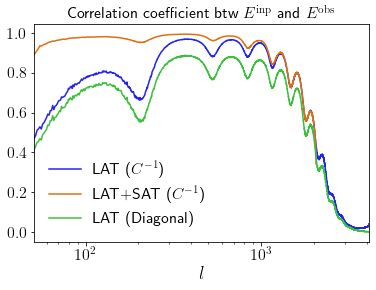

In [10]:
pl.plot_1dstyle(usetex=True,fsize=[6,4],xlab='$l$',ylab='',xlog=True,xmin=51,xmax=4096,**fig_kwargs)
title(r'Correlation coefficient btw $E^{\rm inp}$ and $E^{\rm obs}$',fontsize=16)
for c, lab in zip(types,['',r'LAT ($C^{-1}$)',r'LAT+SAT ($C^{-1}$)',r'LAT (Diagonal)']):
    if c=='id': continue
    plot(l[c],rhoE[c],label=lab)
legend()
savefig('fig_cinv_rho_EE.pdf')

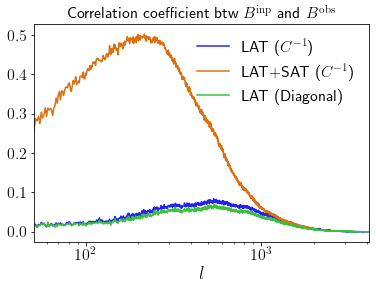

In [11]:
pl.plot_1dstyle(usetex=True,fsize=[6,4],xlab='$l$',ylab='',xmin=51,xlog=True,xmax=4096,**fig_kwargs)
title(r'Correlation coefficient btw $B^{\rm inp}$ and $B^{\rm obs}$',fontsize=16)
for c, lab in zip(types,['',r'LAT ($C^{-1}$)',r'LAT+SAT ($C^{-1}$)',r'LAT (Diagonal)']):
    if c=='id': continue
    plot(l[c],rhoB[c],label=lab)
legend()
savefig('fig_cinv_rho_BB.pdf')